In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
ocd = pd.read_csv('/content/OCD Patient Dataset.csv')
ocd.head(3)

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine


In [104]:
ocd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [105]:
# Finding the missing values :-

ocd.isnull().sum()

,0
Patient ID,0
Age,0
Gender,0
Ethnicity,0
Marital Status,0
Education Level,0
OCD Diagnosis Date,0
Duration of Symptoms (months),0
Previous Diagnoses,248
Family History of OCD,0


# Performing Exploratary Data Analysis(EDA) :-

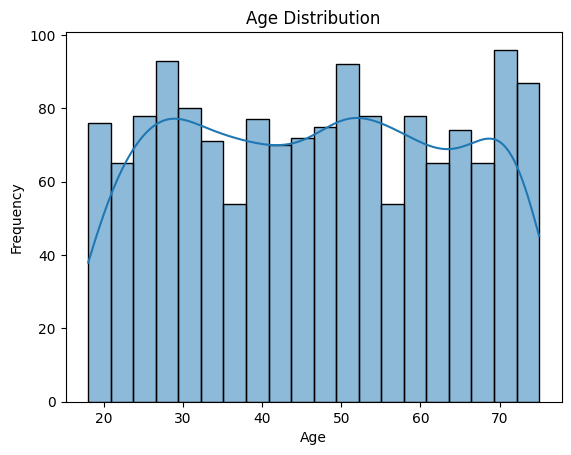

In [106]:
# Age Distribution :-

sns.histplot(ocd['Age'], bins = 20, kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-1850848396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = ocd, palette = ['red', 'green'])


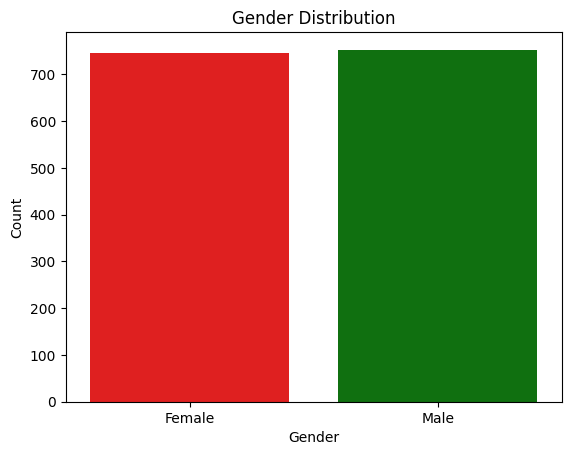

In [107]:
# Gender Distribution :-

sns.countplot(x = 'Gender', data = ocd, palette = ['red', 'green'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2671418182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Ethnicity', data = ocd, palette = ['yellow', 'red', 'blue', 'green'])


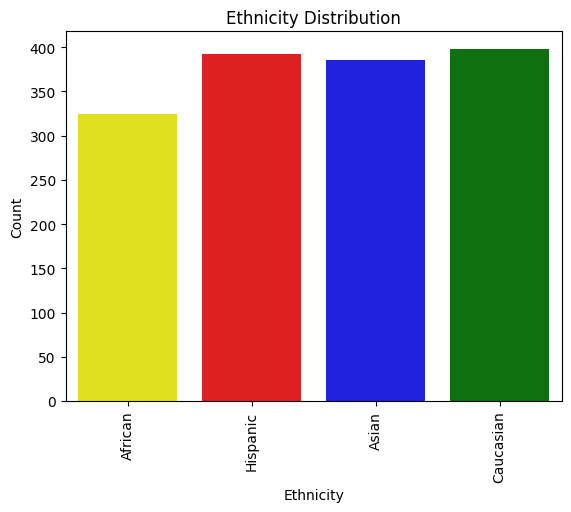

In [108]:
# Ethinicity Distribution :-

sns.countplot(x = 'Ethnicity', data = ocd, palette = ['yellow', 'red', 'blue', 'green'])
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

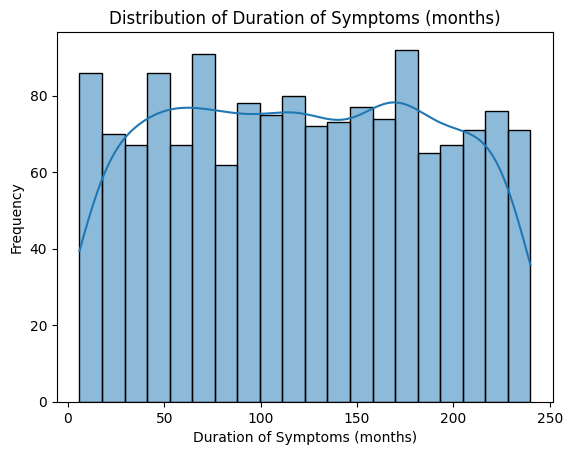

In [109]:
# Distribution of Duration of Symptoms (months) :-

sns.histplot(ocd['Duration of Symptoms (months)'], bins = 20, kde = True)
plt.title('Distribution of Duration of Symptoms (months)')
plt.xlabel('Duration of Symptoms (months)')
plt.ylabel('Frequency')
plt.show()

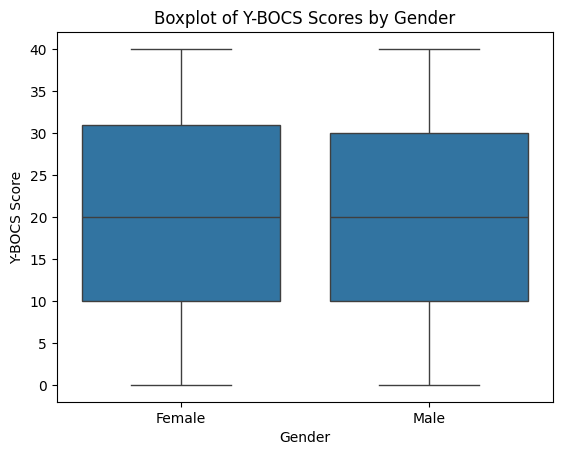

In [110]:
# Boxplot of Y-BOCS Scores by Gender :-

sns.boxplot(x = 'Gender', y = 'Y-BOCS Score (Obsessions)', data = ocd)
plt.title('Boxplot of Y-BOCS Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score')
plt.show()

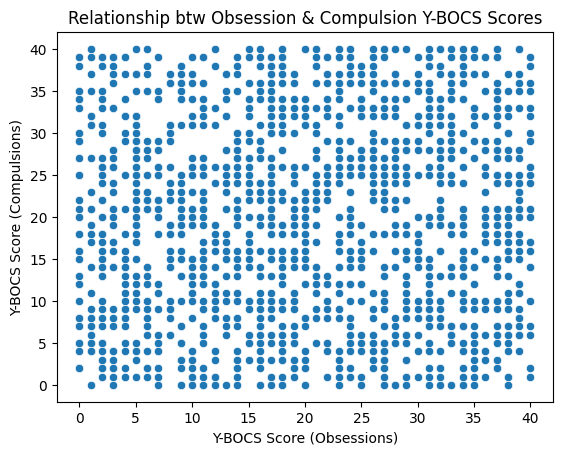

In [111]:
# Relationship btw Obsession & Compulsion Y-BOCS Scores :-

sns.scatterplot(x = 'Y-BOCS Score (Obsessions)', y = 'Y-BOCS Score (Compulsions)', data = ocd)
plt.title('Relationship btw Obsession & Compulsion Y-BOCS Scores')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.show()

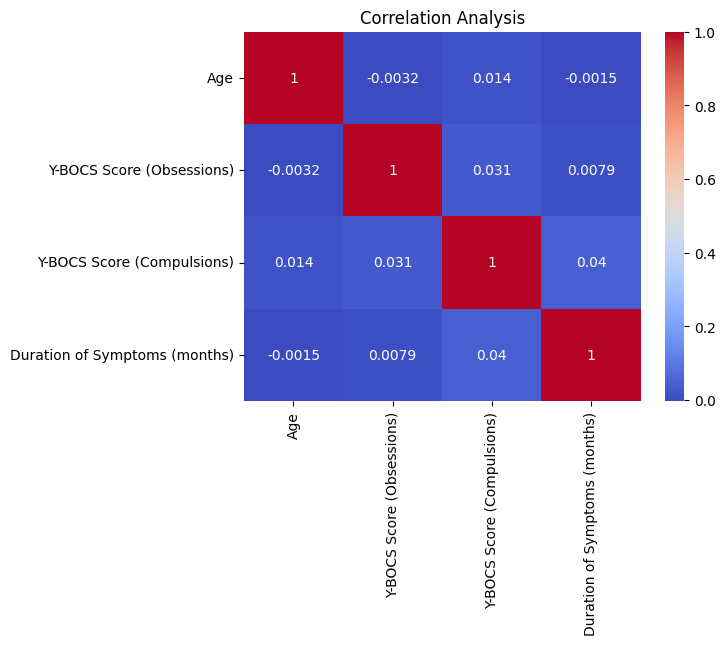

In [112]:
# Co-Realtion Analysis :-

correlation_matrix = ocd[['Age', 'Y-BOCS Score (Obsessions)','Y-BOCS Score (Compulsions)', 'Duration of Symptoms (months)']].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Analysis')
plt.show()

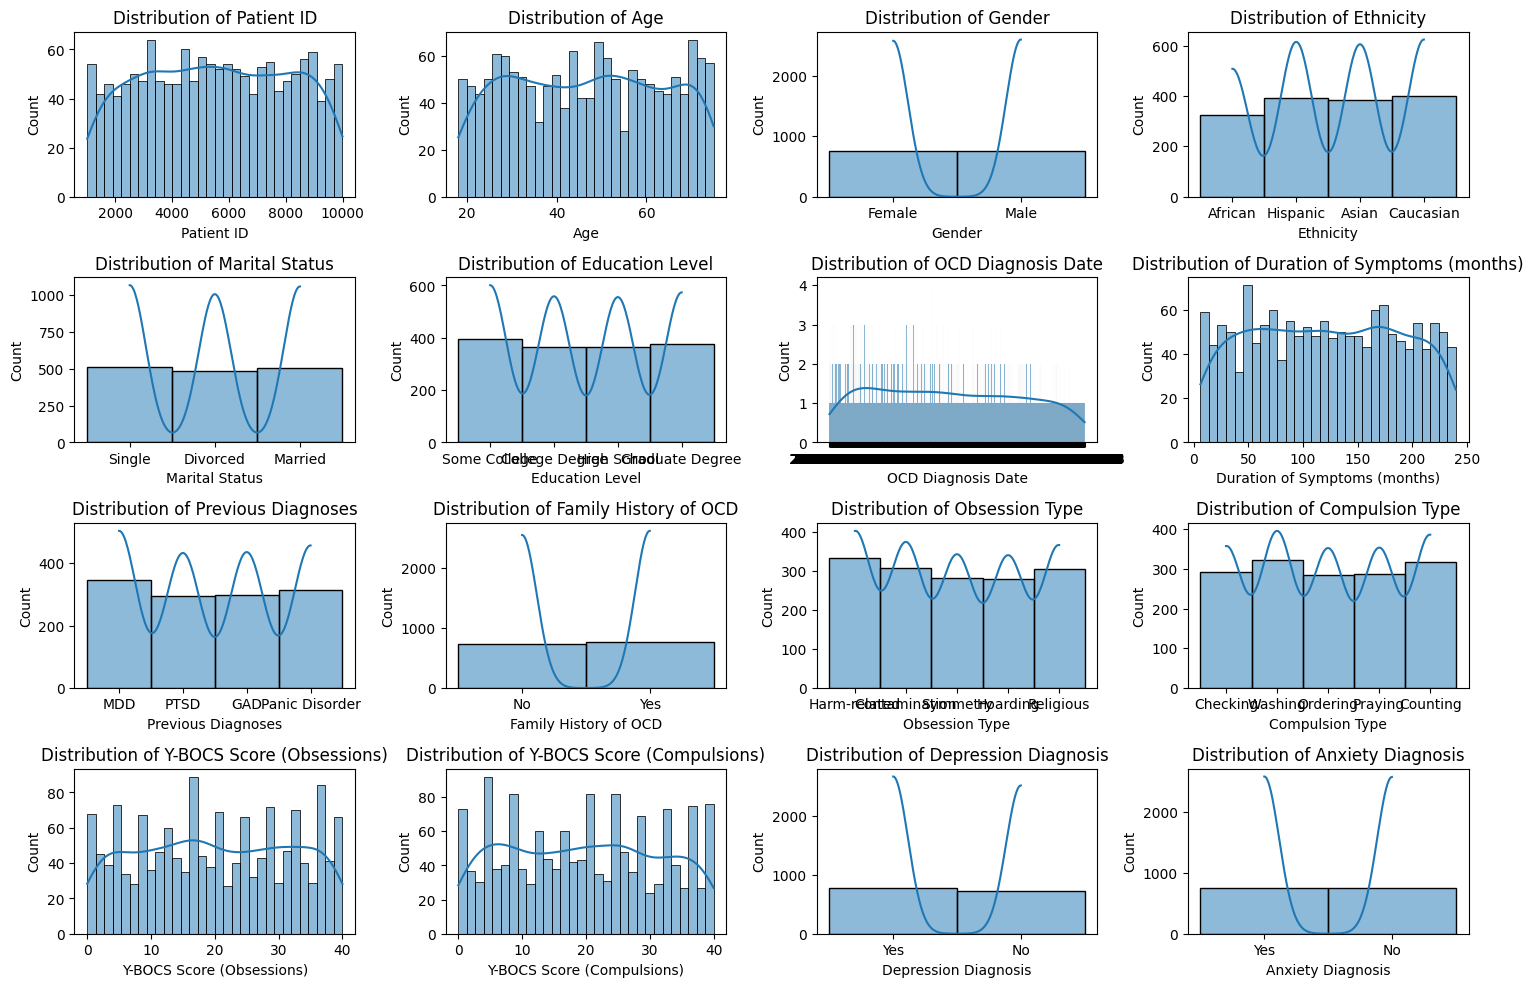

In [113]:
# Plot distribution for all numeric features :-

plt.figure(figsize=(15, 12))
for i, column in enumerate(ocd.columns[:-1], 1):
    plt.subplot(5, 4, i)
    sns.histplot(ocd[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [114]:
ocd['Medications'].value_counts()

,count
Medications,
Benzodiazepine,386
SNRI,376
SSRI,352


# Performing Feature Engenerring :-

In [115]:
# Removing the unwanted columns from the Datset :-

ocd.drop(['Patient ID', 'OCD Diagnosis Date'], axis = 1, inplace = True)

In [116]:
# Filling the missing values :-

ocd['Previous Diagnoses'].fillna(ocd['Previous Diagnoses'].mode()[0], inplace = True)

/tmp/ipython-input-1237016333.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ocd['Previous Diagnoses'].fillna(ocd['Previous Diagnoses'].mode()[0], inplace = True)


In [117]:
ocd.columns

Index(['Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Level',
       'Duration of Symptoms (months)', 'Previous Diagnoses',
       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications'],
      dtype='object')

In [119]:
# One-Hot Encoding :-

ocd = pd.get_dummies(ocd, columns = ['Gender', 'Ethnicity', 'Marital Status', 'Education Level', 'Previous Diagnoses', 'Family History of OCD', 'Obsession Type', 'Compulsion Type', 'Depression Diagnosis', 'Anxiety Diagnosis'])

In [120]:
# Replacing the Dependant variable values :-

ocd['Medications'].fillna(ocd['Medications'].mode()[0], inplace = True)

/tmp/ipython-input-466594082.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ocd['Medications'].fillna(ocd['Medications'].mode()[0], inplace = True)


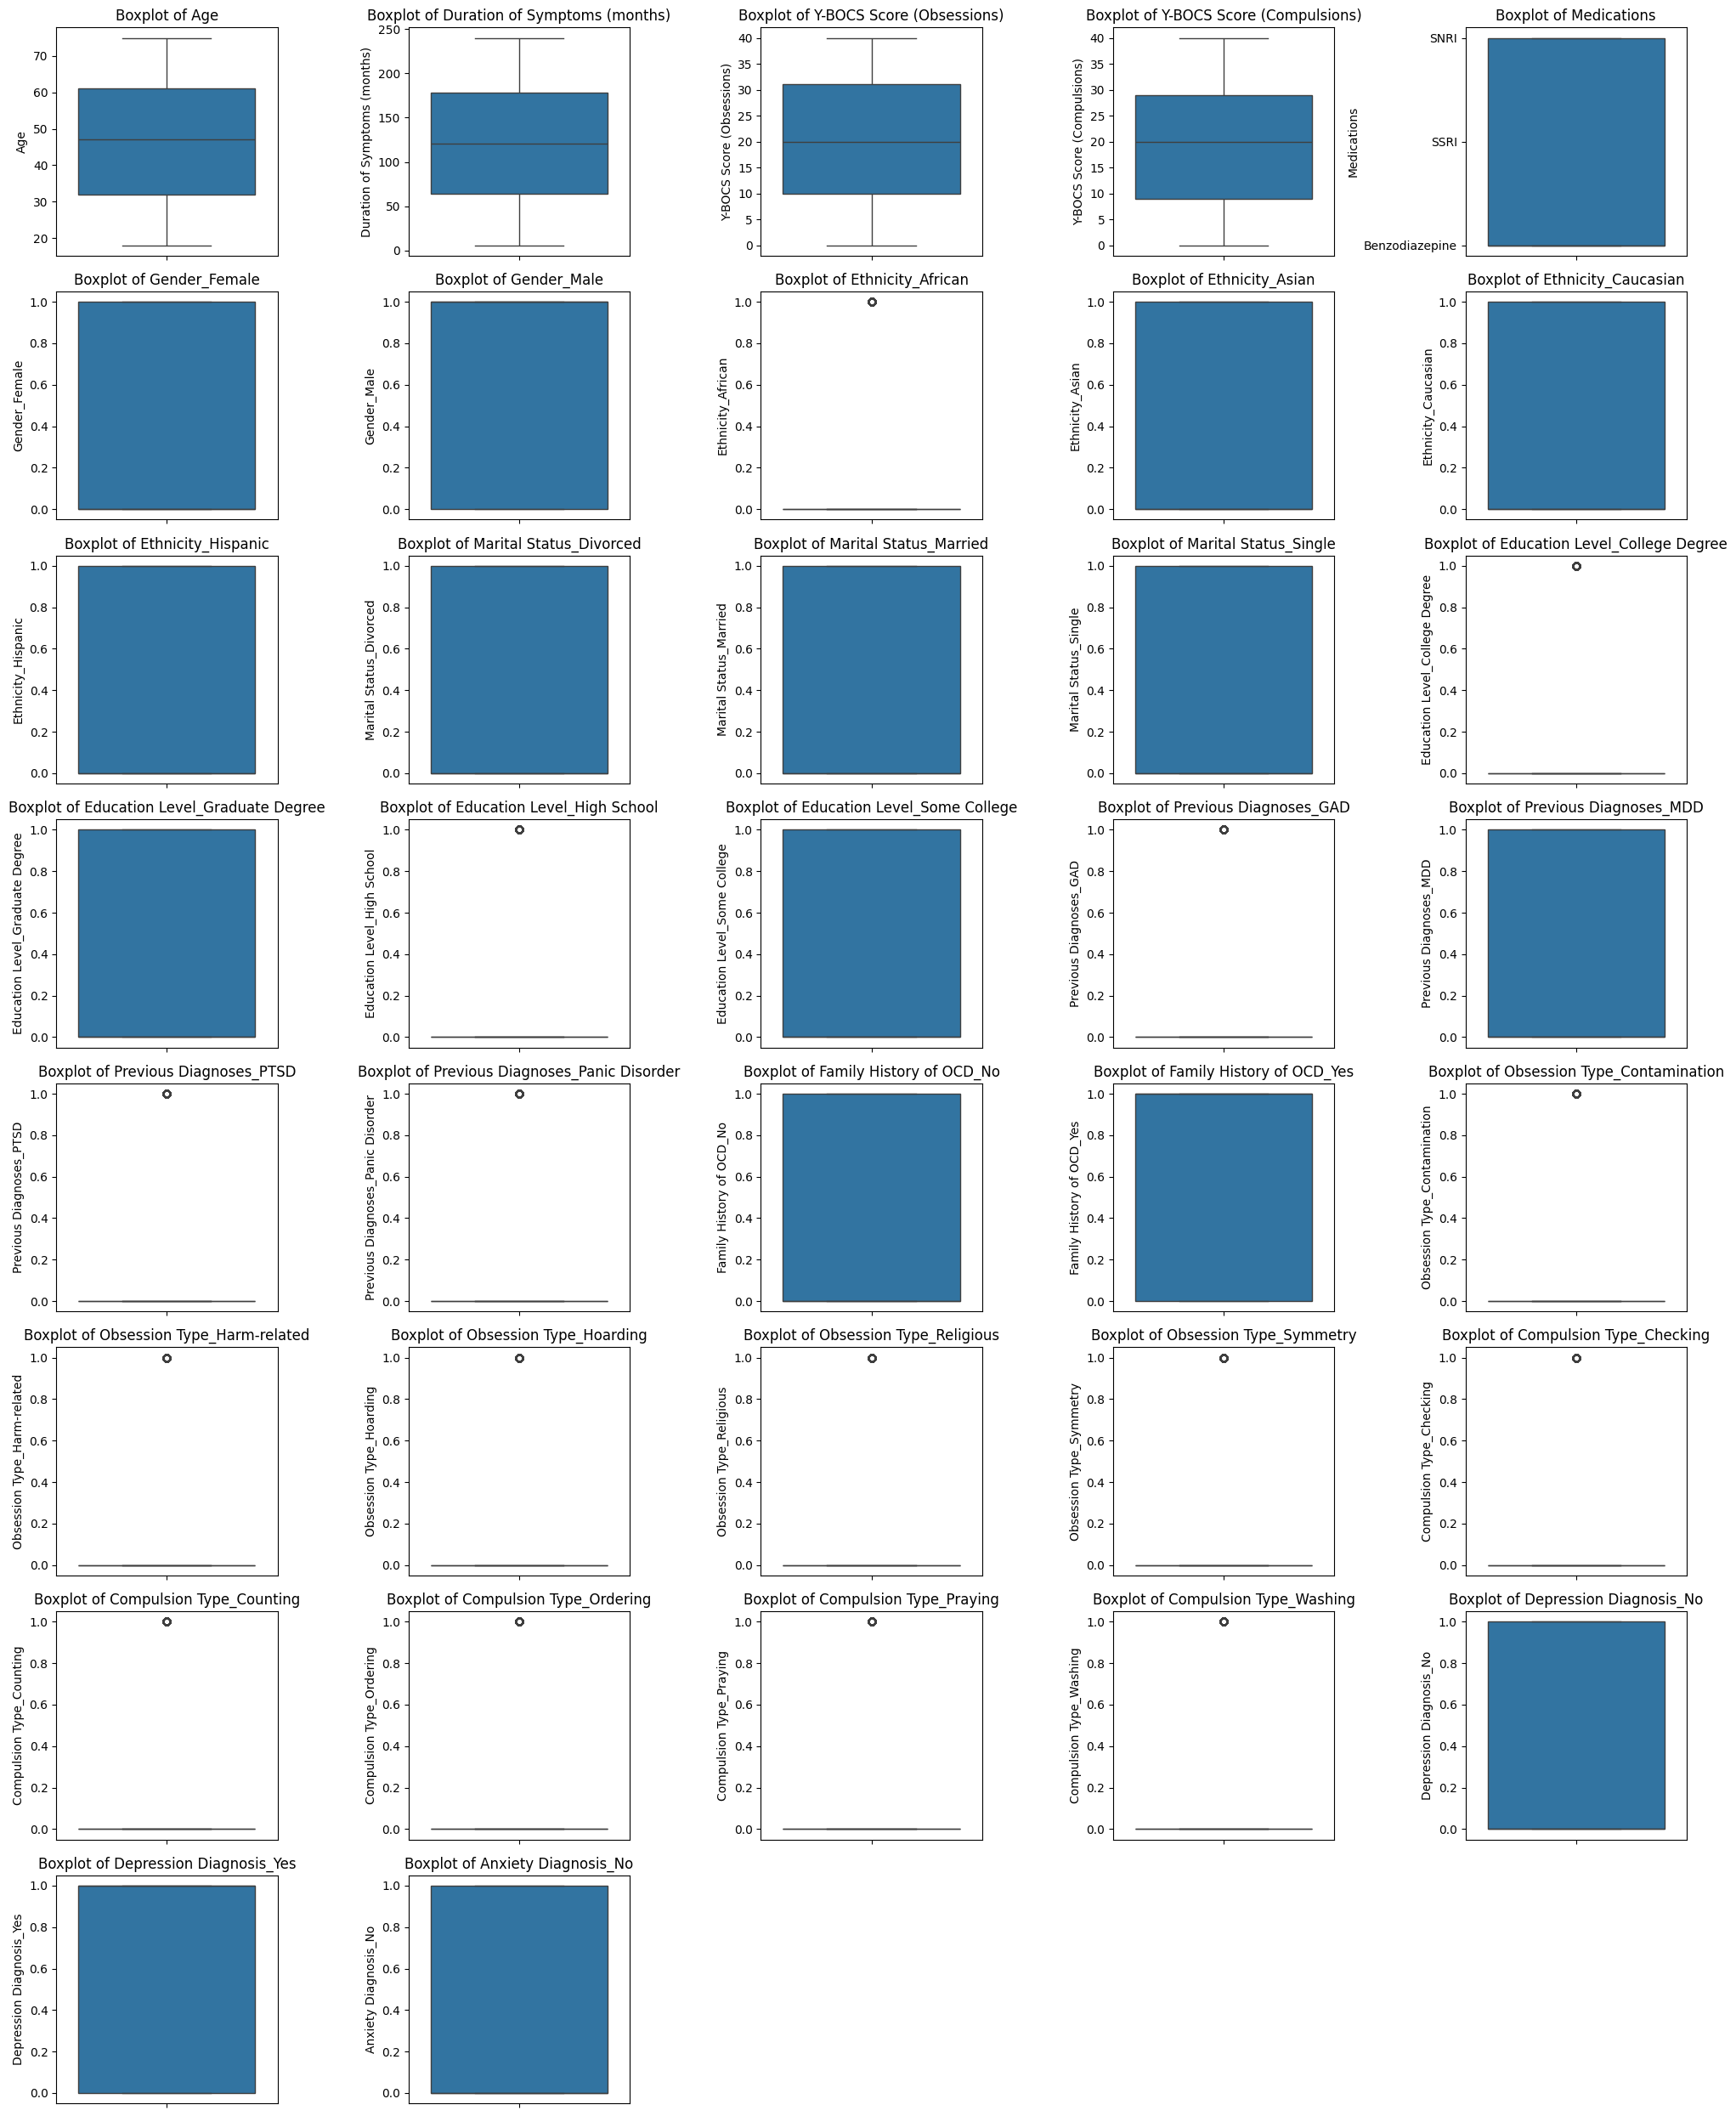

In [121]:
# Finding the Outliers using Box-Plot in the dataset :-

plt.figure(figsize=(20, 25)) # Increased figure size to accommodate more subplots
for i, column in enumerate(ocd.columns[:-1], 1):
    plt.subplot(8, 5, i) # Increased number of subplots to 8 rows and 5 columns
    sns.boxplot(ocd[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [123]:
# Finding the Outliers Using IQR method :-

for column in ocd.select_dtypes(include=np.number).columns:
  Q1 = ocd[column].quantile(0.25)
  Q3 = ocd[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = ocd[(ocd[column] < lower_bound) | (ocd[column] > upper_bound)]
  print(f"{column}: {outliers.shape[0]} outliers")

Age: 0 outliers
Duration of Symptoms (months): 0 outliers
Y-BOCS Score (Obsessions): 0 outliers
Y-BOCS Score (Compulsions): 0 outliers


In [124]:
# Defining the Independent & Dependent variable :-

X = ocd.drop('Medications', axis = 1)
Y = ocd['Medications']

In [125]:
# Splitting the dataset into train-test split :-

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [127]:
# Implementing The models :-

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier # Corrected import
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [128]:
models = {

    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}


In [130]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable numerically
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)
Y_test_encoded = le.transform(Y_test)

best_model = None
best_r2_score = -float('inf')
for name, model in models.items():
    model.fit(X_train, Y_train_encoded)
    y_pred = model.predict(X_test)
    current_r2_score = model.score(X_test, Y_test_encoded)
    print(f"{name}: R2 Score = {current_r2_score}")
    if current_r2_score > best_r2_score:
        best_r2_score = current_r2_score
        best_model = model

print(f"Best Model: {best_model}")

Decision Tree: R2 Score = 0.42
Random Forest: R2 Score = 0.5
Support Vector Machine: R2 Score = 0.54
K-Nearest Neighbors: R2 Score = 0.43
XGBoost: R2 Score = 0.44666666666666666
Gradient Boosting: R2 Score = 0.4766666666666667
AdaBoost: R2 Score = 0.5366666666666666
Best Model: SVC()


# Selecting the SVC Model bcz it giving the higher accuracy :-

In [135]:
svc = SVC(random_state=42)

In [132]:
# Applying Hyper- parameter tuning :-

param_dist = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']

}

# Apllying RandomizedSearchCV :-

In [136]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=SVC(random_state=42),
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1_macro'
)

In [137]:
random_search.fit(X_train, Y_train_encoded)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='f1_macro', verbose=2)

In [138]:
print("\nBest CV Score (f1_macro):", random_search.best_score_)
print("Best Parameters:", random_search.best_params_)


Best CV Score (f1_macro): 0.2246774467129645
Best Parameters: {'kernel': 'linear', 'gamma': 1, 'C': 1}


In [139]:
# ---- Tuned Model Evaluation ----
best_svc = random_search.best_estimator_
tuned_pred = best_svc.predict(X_test)

In [141]:
print("\n--- Tuned SVC (Fast RandomizedSearchCV) ---")
print("Accuracy:", accuracy_score(Y_test_encoded, tuned_pred))
print(classification_report(Y_test_encoded, tuned_pred))


--- Tuned SVC (Fast RandomizedSearchCV) ---
Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       162
           1       0.00      0.00      0.00        79
           2       0.00      0.00      0.00        59

    accuracy                           0.54       300
   macro avg       0.18      0.33      0.23       300
weighted avg       0.29      0.54      0.38       300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [142]:
# Saving the model using Joblib :-

import joblib
joblib.dump(best_svc, 'best_svc_model.joblib')

['best_svc_model.joblib']

In [143]:
# Load the model :-

loaded_model = joblib.load('best_svc_model.joblib')

In [144]:
loaded_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Applying RandomizedSearchCV :-